# Understand the Data

Taarak Mehta Ka Ooltah Chashmah (TMKOC) is a long-running Indian sitcom that premiered in 2008 on Sony SAB. Based on the humorous writings of Gujarati author Taarak Mehta, the show revolves around the residents of the Gokuldham Co-operative Housing Society in Mumbai. (from internet)

In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

import warnings
warnings.filterwarnings('ignore')

In [3]:

source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\TMKOC_Analysis\TMKOC_Episode.csv'
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(7)


,Unnamed: 0,episode_number,Episode_title,description,Episode_runtime,Released_on
710,710,711,Jethalal's Dream,"Jethalal starts preparing for the ""Ravan Dahan...",19 mins,30 Jan 2020
2313,2313,2314,Special Episode,Taarak and Jethalal plan to trick Chheda by ap...,20 mins,14 Oct 2017
3128,3128,3130,Babita's Special Dinner,Babita is planning to cook a special dinner fo...,21 mins,25 Mar 2021
280,280,281,Jethalal As A Sardar,Jethalal somehow finds a friend at the club an...,19 mins,08 Jan 2020
2002,2002,2003,Independence Day In Gokuldham,Gogi starts throwing the ball and one by one t...,21 mins,16 Aug 2016
1751,1751,1752,Sundar's Surprise For Daya,Sundar surprised Daya on the eve of Raksha Ban...,19 mins,01 Sep 2015
1638,1638,1639,Babita's Dinner Offer,Daya is at the hospital awaiting the good news...,19 mins,29 May 2020


In [4]:
print(df.shape)
print(df.size)

(4095, 6)
24570


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4095 non-null   int64 
 1   episode_number   4095 non-null   int64 
 2   Episode_title    4095 non-null   object
 3   description      4095 non-null   object
 4   Episode_runtime  4095 non-null   object
 5   Released_on      4084 non-null   object
dtypes: int64(2), object(4)
memory usage: 192.1+ KB


In [6]:
df.describe(include='all')

,Unnamed: 0,episode_number,Episode_title,description,Episode_runtime,Released_on
count,4095.000000,4095.000000,4095,4095,4095,4084
unique,NaN,NaN,4023,4091,31,2544
top,NaN,NaN,Dr,Jethalal scolds Bagha. He tells him that he ca...,20 mins,08 Jan 2020
freq,NaN,NaN,13,3,1445,226
mean,2047.000000,2048.515018,NaN,NaN,NaN,NaN
std,1182.269005,1182.999833,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,1023.500000,1024.500000,NaN,NaN,NaN,NaN
50%,2047.000000,2048.000000,NaN,NaN,NaN,NaN
75%,3070.500000,3072.500000,NaN,NaN,NaN,NaN


# Data Cleaning

<Axes: >

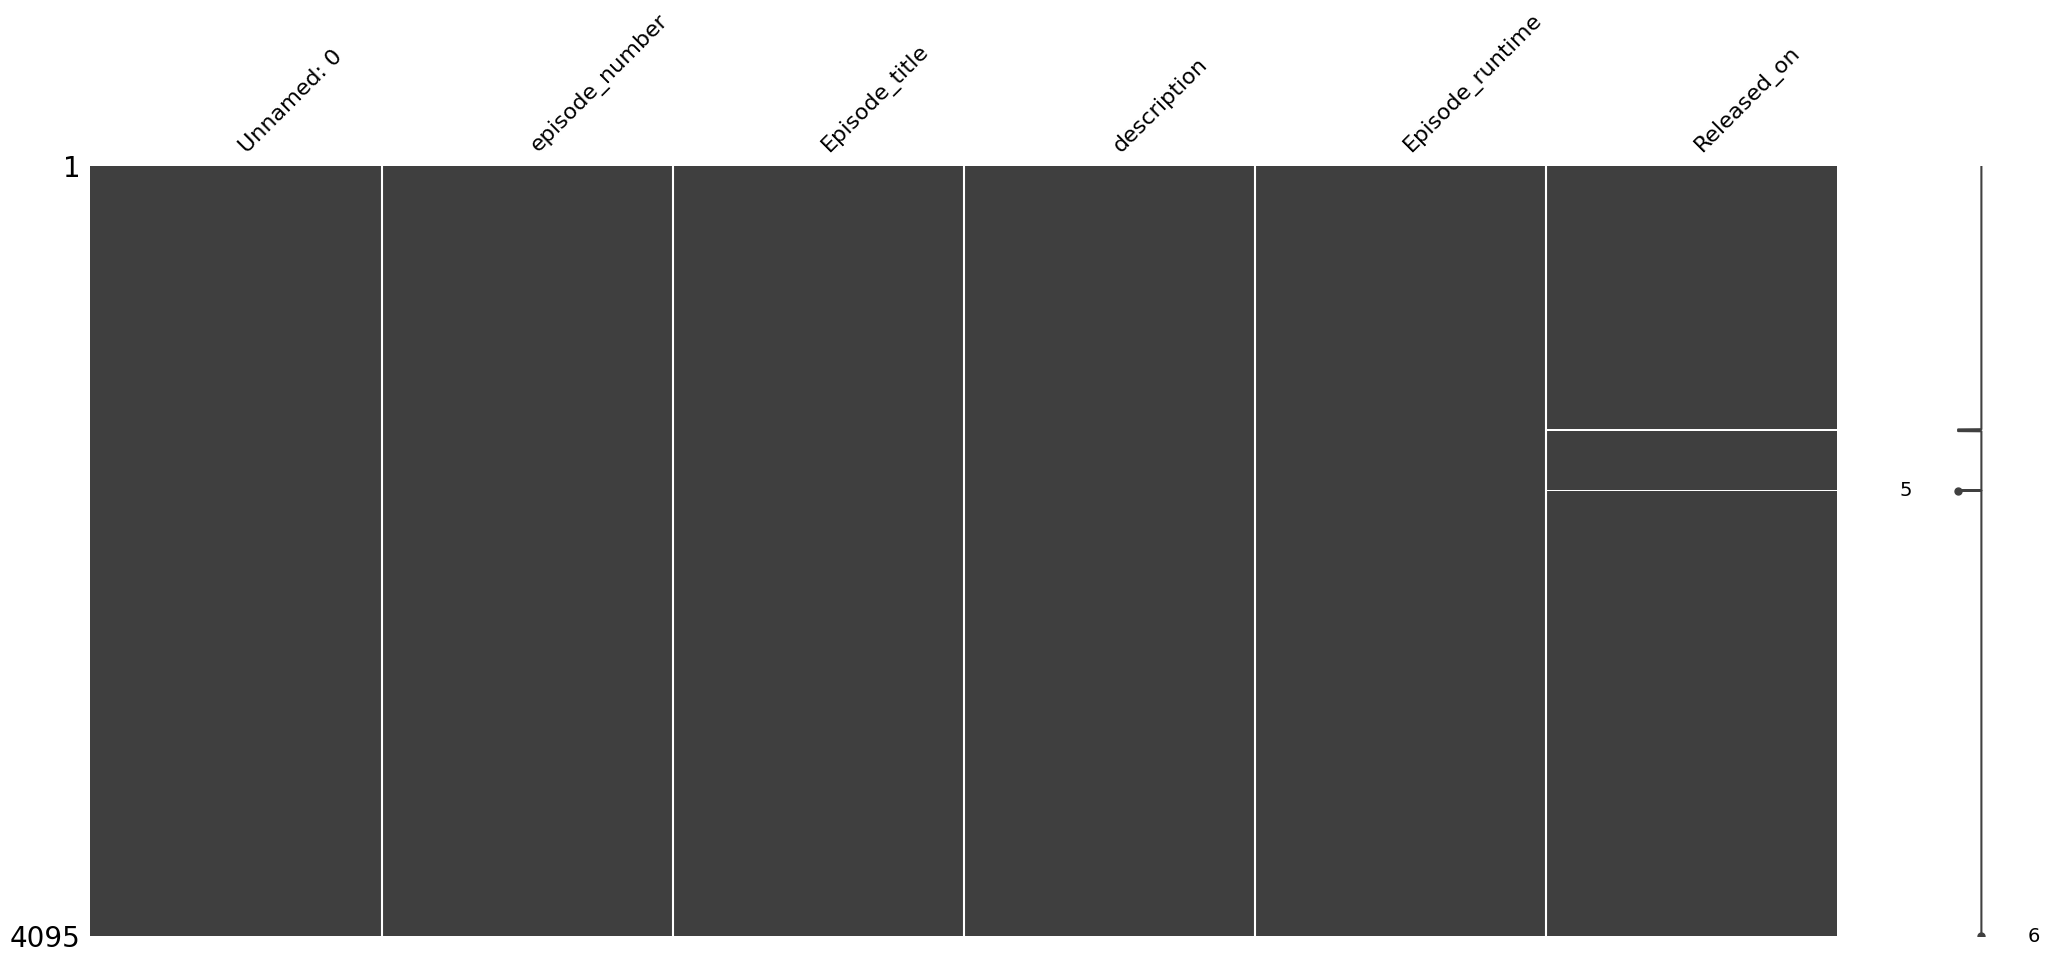

In [7]:
msno.matrix(df)

Dataset is almost clear
but their are some accuracy problem

In [8]:
df.columns

Index(['Unnamed: 0', 'episode_number', 'Episode_title', 'description',
       'Episode_runtime', 'Released_on'],
      dtype='object')

## Cleaning
- Change the colum name Unnamed: 0 into `index`
-  change the datatype of 'Episode_runtime' into `Int64`
- Change the datatype of  'Released_on' column into `Datetime64[ns]`

In [9]:
df['runtime'] = df['Episode_runtime'].str.split(' ').str[0]
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
df['Released_on'] = df['Released_on'].astype('datetime64[ns]')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            4095 non-null   int64         
 1   episode_number   4095 non-null   int64         
 2   Episode_title    4095 non-null   object        
 3   description      4095 non-null   object        
 4   Episode_runtime  4095 non-null   object        
 5   Released_on      4084 non-null   datetime64[ns]
 6   runtime          4095 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 224.1+ KB


# EDA

## Total runtime 

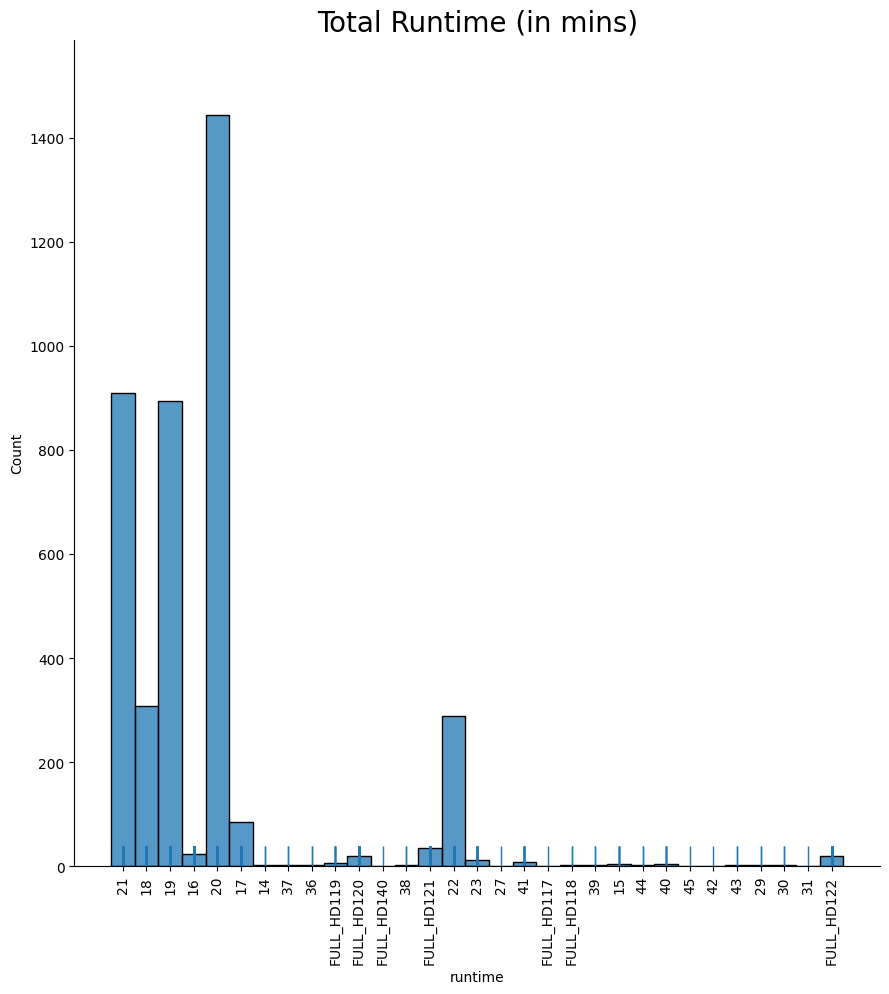

In [11]:
sns.displot(
    df,
    x='runtime',
    kind='hist',
    height=9,
    rug=True,
)

plt.xticks(rotation=90)
plt.title('Total Runtime (in mins)', size=20)
plt.show()

In [12]:
df

,index,episode_number,Episode_title,description,Episode_runtime,Released_on,runtime
0,0,1,Taarak Mehta Introduces Himself And Society Me...,Taarak Mehta introduces himself and the societ...,21 mins,2008-07-28,21
1,1,2,Jethalal's Son Tapu Decides To Spend His Holiday,Jethalal's son Tapu decides to spend his holid...,18 mins,2008-07-29,18
2,2,3,Tapu Has Been The Worry Of Jethalal,"More than the society members, Tapu has been t...",19 mins,2008-07-30,19
3,3,4,Daya Approaches Taarak Mehta For Help,Tapu lands Jethalal Gada into yet another trou...,18 mins,2008-07-31,18
4,4,5,Jethalal In Huge Trouble,Tapu has decided to take full revenge from his...,18 mins,2008-08-01,18
...,...,...,...,...,...,...,...
4090,4090,4096,Mission Paar Paar,Tapu Sena reviews the plan with everyone to av...,21 mins,2024-05-28,21
4091,4091,4097,Ganda Paani Ka Istamal,Kurmura Kumar and Chana Kumar work at the butt...,21 mins,2024-05-29,21
4092,4092,4098,Kumura Aur Chana Fass Gaye,Two men drink buttermilk from the stall and fa...,21 mins,2024-05-30,21
4093,4093,4099,Anjali Ka Juice,"Taarak urgently calls everyone over, announcin...",22 mins,2024-05-31,22


## Each year episode produced

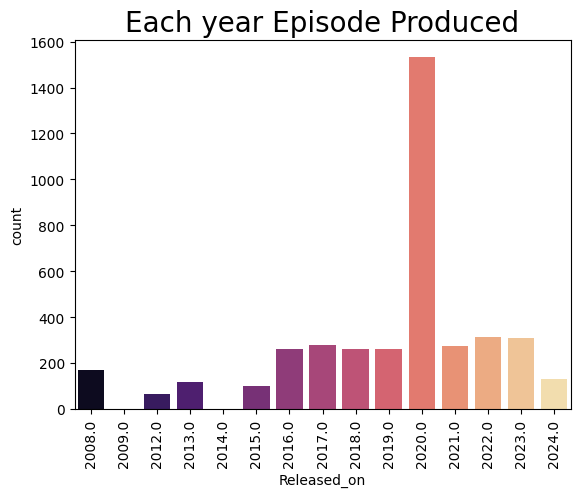

In [13]:
sns.countplot(
    data=df, 
    x=df['Released_on'].dt.year,
    palette='magma',

)

# plotting 
plt.title('Each year Episode Produced', size=20)
plt.xticks(rotation=90) 
plt.show()

## What is the relation ?

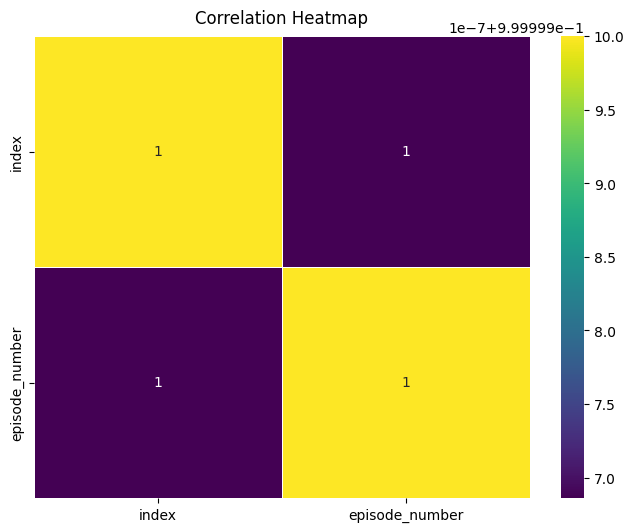

In [14]:
num_df = df.select_dtypes(include=[np.number])

corr_matrix = num_df.corr()

# plotting
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap', y=1.01)
plt.show()

# Conclusion

In this notebook we analysis the TMKOC dataset with basic graph and Cleaning.